# Gator Oscillator

https://www.metatrader5.com/en/terminal/help/indicators/bw_indicators/go

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400


In [3]:
def SMMA(price, n, m=3):
    SMMA = np.array([np.nan] * len(price))
    SMMA[n - 2] = price[:n - 1].mean()
    for i in range(n - 1, len(price)):
        SMMA[i] = (SMMA [i - 1] * (n - 2) + 2 * price[i]) / n
    return SMMA

In [4]:
medianprice = (df['High']/2) + (df['Low']/2)
df['Jaw'] = SMMA(medianprice,13,8)
df['Teeth'] = SMMA(medianprice,8 ,5)
df['Lips']  = SMMA(medianprice,5 ,3) 

In [5]:
df

,Open,High,Low,Close,Adj Close,Volume,Jaw,Teeth,Lips
Date,,,,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700,NaN,NaN,NaN
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000,NaN,NaN,NaN
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400,NaN,NaN,NaN
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400,NaN,NaN,204.792501
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400,NaN,NaN,206.127500
2018-08-08,206.050003,207.809998,204.520004,207.250000,204.928696,22525500,NaN,NaN,206.142500
2018-08-09,207.279999,209.779999,207.199997,208.880005,206.540436,23469200,NaN,205.993572,207.081499
2018-08-10,207.360001,209.100006,206.669998,207.529999,205.925232,24611200,NaN,206.466429,207.402900
2018-08-13,207.699997,210.949997,207.699997,208.869995,207.254883,25869100,NaN,207.181071,208.171739


https://mahifx.com/mfxtrade/indicators/gator-oscillator

Top bars of histogram (Above zero) = Absolute value (Jaw – Teeth)

Bottom bars of histogram (Below zero) = - {Absolute value of (Teeth – Lips)}

In [6]:
df['Top_Bars'] = abs(df['Jaw'] - df['Teeth'])
df['Bottom_Bars'] = -(abs(df['Teeth'] - df['Lips']))

In [7]:
df

,Open,High,Low,Close,Adj Close,Volume,Jaw,Teeth,Lips,Top_Bars,Bottom_Bars
Date,,,,,,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700,NaN,NaN,NaN,NaN,NaN
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000,NaN,NaN,NaN,NaN,NaN
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400,NaN,NaN,NaN,NaN,NaN
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400,NaN,NaN,204.792501,NaN,NaN
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400,NaN,NaN,206.127500,NaN,NaN
2018-08-08,206.050003,207.809998,204.520004,207.250000,204.928696,22525500,NaN,NaN,206.142500,NaN,NaN
2018-08-09,207.279999,209.779999,207.199997,208.880005,206.540436,23469200,NaN,205.993572,207.081499,NaN,-1.087928
2018-08-10,207.360001,209.100006,206.669998,207.529999,205.925232,24611200,NaN,206.466429,207.402900,NaN,-0.936471
2018-08-13,207.699997,210.949997,207.699997,208.869995,207.254883,25869100,NaN,207.181071,208.171739,NaN,-0.990668


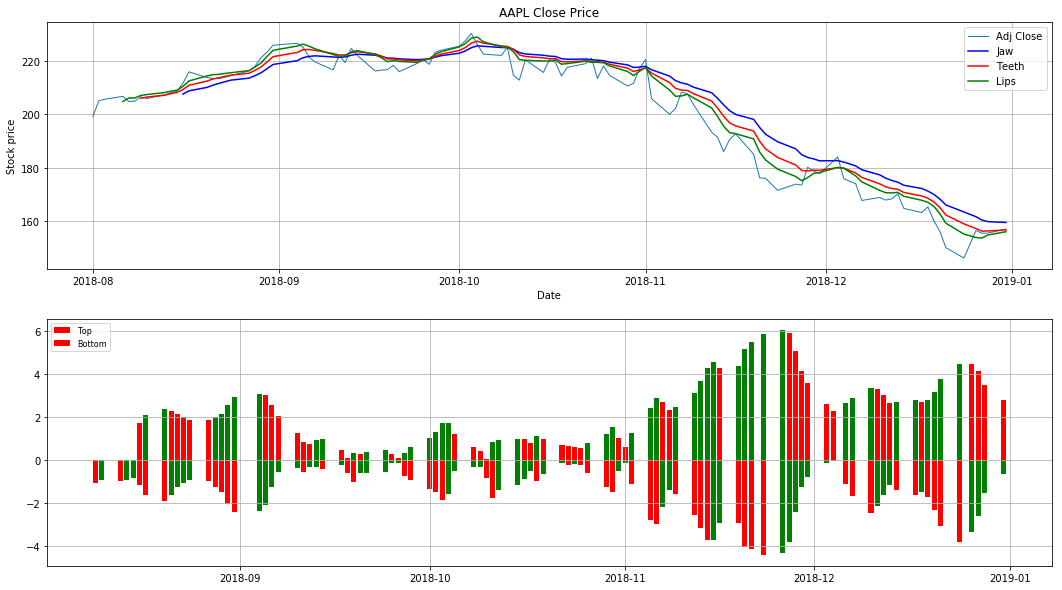

In [8]:
fig = plt.figure(figsize=(18,10))

ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(df['Adj Close'],lw=1)
ax1.plot(df['Jaw'],color='blue')
ax1.plot(df['Teeth'],color='red')
ax1.plot(df['Lips'],color='green')
ax1.set_title(symbol + ' Close Price')
ax1.set_ylabel('Stock price')
ax1.set_xlabel('Date')
ax1.grid(True)
ax1.legend(loc='best')

ax2 = fig.add_subplot(2, 1, 2)
df['Positive_T'] = df.Top_Bars > df.Top_Bars.shift(1)
df['Positive_B'] = df.Bottom_Bars > df.Bottom_Bars.shift(1)
ax2.bar(df.index, df['Top_Bars'], color=df.Positive_T.map({True: 'g', False: 'r'}), label='Top')
ax2.bar(df.index, df['Bottom_Bars'], color=df.Positive_B.map({True: 'g', False: 'r'}), label='Bottom')
#ax2.bar(df.index, df['Top_Bars'],label='Top')
#ax2.bar(df.index, df['Bottom_Bars'],label='Bottom')
ax2.legend(loc=2,prop={'size':8})
ax2.grid(True)

In [9]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Jaw,Teeth,Lips,Top_Bars,Bottom_Bars,Positive_T,Positive_B,VolumePositive
0,736907.0,199.130005,201.759995,197.309998,201.500000,199.243088,67935700,NaN,NaN,NaN,NaN,NaN,False,False,True
1,736908.0,200.580002,208.380005,200.350006,207.389999,205.067123,62404000,NaN,NaN,NaN,NaN,NaN,False,False,True
2,736909.0,207.029999,208.740005,205.479996,207.990005,205.660416,33447400,NaN,NaN,NaN,NaN,NaN,False,False,False
3,736912.0,208.000000,209.250000,207.070007,209.070007,206.728317,25425400,NaN,NaN,204.792501,NaN,NaN,False,False,False
4,736913.0,209.320007,209.500000,206.759995,207.110001,204.790268,25587400,NaN,NaN,206.127500,NaN,NaN,False,False,False


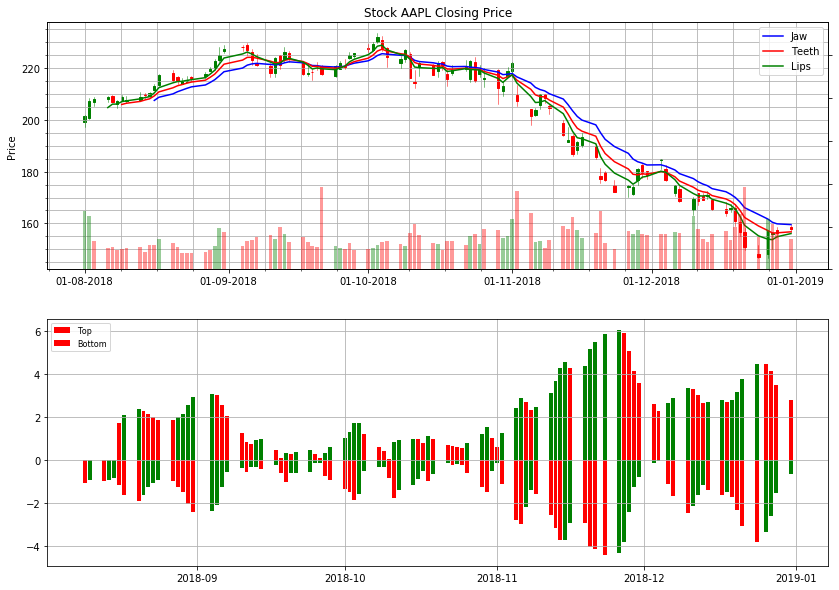

In [10]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df['Jaw'],color='blue')
ax1.plot(df['Teeth'],color='red')
ax1.plot(df['Lips'],color='green')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = fig.add_subplot(2, 1, 2)
df['Positive_T'] = df.Top_Bars > df.Top_Bars.shift(1)
df['Positive_B'] = df.Bottom_Bars > df.Bottom_Bars.shift(1)
ax2.bar(df.index, df['Top_Bars'], color=df.Positive_T.map({True: 'g', False: 'r'}), label='Top')
ax2.bar(df.index, df['Bottom_Bars'], color=df.Positive_B.map({True: 'g', False: 'r'}), label='Bottom')
ax2.legend(loc=2,prop={'size':8})
ax2.grid(True)